### Comparing results from each method
We will use CDlib liberary to compare generated partitions on each graph. we compute three measures : The hub dominance of a community,The average distance and the average embeddedness of nodes within the community.

In [ ]:
! pip install cdlib

In [5]:
from cdlib.evaluation import *
from cdlib import NodeClustering
from scipy.sparse import csr_matrix
from scipy.io import mmread
import networkx as nx
methods   = ['kmeans', 'louvain', 'lpa']
datasets  = ['CA-AstroPh', 'CA-GrQc',  'CA-HepPh', 'CA-HepTh' ]
measures  = ['avg_distance', 'avg_embeddedness', 'avg_internal_degree', 'hub_dominance']
graphs  = dict()
for dataset in datasets:
    m = mmread('data_' + dataset + '.mtx')
    graphs[dataset] = nx.from_scipy_sparse_matrix(m)

 ##### reading graphs from .mtx files 

In [6]:
def get_partition_from_file(file = ''):
    communities = dict()
    with open(file, 'r') as f:
       content = f.readlines()
    for l in content[:-1]:
       n = int(l.split(':')[0])
       c = int(l.split(':')[1])
       try : 
         communities[c].append(n)
       except:
         communities[c] = [n]
    partition = NodeClustering(list(communities.values()), graph=None)
    return partition

###### saving results in a dict() results

In [7]:
results = dict()
for d in datasets:
  results[d] = dict()
  for m in methods : 
      print( d + '  ' + m)
      partition = get_partition_from_file(file = 'results_' + m + '_node_to_community.' + d )
      # avg_distance 
      results[d][m] = { 'avg_distance' : avg_distance(graphs[d], partition ), 
                        'avg_embeddedness': avg_embeddedness(graphs[d], partition ),
                        'hub_dominance' : hub_dominance(graphs[d], partition )
                    }


CA-AstroPh  kmeans
CA-AstroPh  louvain
CA-AstroPh  lpa
CA-GrQc  kmeans
CA-GrQc  louvain
CA-GrQc  lpa
CA-HepPh  kmeans
CA-HepPh  louvain
CA-HepPh  lpa
CA-HepTh  kmeans
CA-HepTh  louvain
CA-HepTh  lpa


##### Saving results in a csv file 

In [20]:
with open('comparing_methods.csv', 'w') as file:
  file.write('dataset,method,avg_distance,avg_embeddedness,hub_dominance \n')
  for d in datasets:
    for m in methods:
      file.write(d + ',' + m + ',' + str(results[d][m]['avg_distance'][2]) + ',' +\
                 str(results[d][m]['avg_embeddedness'][2]) + ',' + str(results[d][m]['hub_dominance'][2]) + '\n')

##### Visualization of results : 

In [21]:
import pandas as pd

df = pd.read_csv('comparing_methods.csv')
df

,dataset,method,avg_distance,avg_embeddedness,hub_dominance
0,CA-AstroPh,kmeans,2.333726,0.731245,0.492994
1,CA-AstroPh,louvain,1.317355,0.979792,0.921361
2,CA-AstroPh,lpa,1.157246,0.751978,0.972243
3,CA-GrQc,kmeans,1.892426,0.887565,0.697484
4,CA-GrQc,louvain,1.366557,0.993867,0.936171
5,CA-GrQc,lpa,1.275682,0.805266,0.953015
6,CA-HepPh,kmeans,2.427062,0.806913,0.530313
7,CA-HepPh,louvain,1.299755,0.984621,0.937755
8,CA-HepPh,lpa,1.238455,0.740193,0.955700
9,CA-HepTh,kmeans,2.387306,0.845102,0.535344


[0 1 2 3]


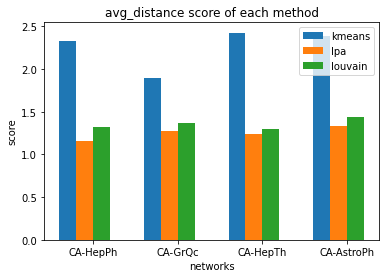

In [42]:
import numpy as np 
import matplotlib.pyplot as plt 

X = set(list(df['dataset']))
X_axis = np.arange(len(X))
kmeans =  df.loc[df['method'] == 'kmeans']
lpa =  df.loc[df['method'] == 'lpa']
louvain = df.loc[df['method'] == 'louvain']
print(X_axis)
plt.bar(X_axis - 0.3, list(kmeans['avg_distance']), 0.2, label = 'kmeans')
plt.bar(X_axis - 0.1, list(lpa['avg_distance']), 0.2, label = 'lpa')
plt.bar(X_axis + 0.1, list(louvain['avg_distance']), 0.2, label = 'louvain')
plt.xticks(X_axis, X)
plt.xlabel("networks")
plt.ylabel("score")
plt.title("avg_distance score of each method")
plt.legend()
plt.show()

[0 1 2 3]


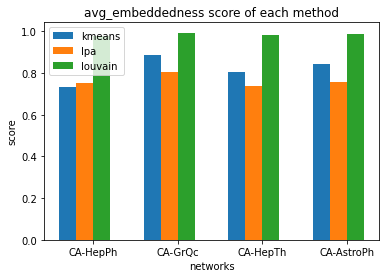

In [43]:
X = set(list(df['dataset']))
X_axis = np.arange(len(X))
kmeans =  df.loc[df['method'] == 'kmeans']
lpa =  df.loc[df['method'] == 'lpa']
louvain = df.loc[df['method'] == 'louvain']
print(X_axis)
plt.bar(X_axis - 0.3, list(kmeans['avg_embeddedness']), 0.2, label = 'kmeans')
plt.bar(X_axis - 0.1, list(lpa['avg_embeddedness']), 0.2, label = 'lpa')
plt.bar(X_axis + 0.1, list(louvain['avg_embeddedness']), 0.2, label = 'louvain')
plt.xticks(X_axis, X)
plt.xlabel("networks")
plt.ylabel("score")
plt.title("avg_embeddedness score of each method")
plt.legend()
plt.show()

[0 1 2 3]


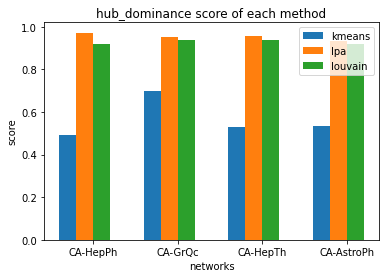

In [50]:
X = set(list(df['dataset']))
X_axis = np.arange(len(X))
kmeans =  df.loc[df['method'] == 'kmeans']
lpa =  df.loc[df['method'] == 'lpa']
louvain = df.loc[df['method'] == 'louvain']
print(X_axis)
plt.bar(X_axis - 0.3, list(kmeans['hub_dominance ']), 0.2, label = 'kmeans')
plt.bar(X_axis - 0.1, list(lpa['hub_dominance ']), 0.2, label = 'lpa')
plt.bar(X_axis + 0.1, list(louvain['hub_dominance ']), 0.2, label = 'louvain')
plt.xticks(X_axis, X)
plt.xlabel("networks")
plt.ylabel("score")
plt.title("hub_dominance score of each method")
plt.legend()
plt.show()